In [6]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
# from scipy.integrate import quad

from ipynb.fs.full.Task3 import TrapezeIntegral
from ipynb.fs.full.Task3 import SimpsonIntegral
from ipynb.fs.full.Task2 import NumericalDerivative
from ipynb.fs.full.Task2 import NumericalDerivative2

plt.rcParams["figure.figsize"] = (8,8)
plt.rcParams['figure.dpi']  = 200

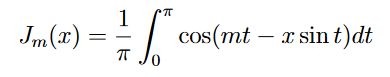

In [7]:
def JmTrapeze(x : float, m : int, steps : int = 100) -> float:
    return TrapezeIntegral(lambda t : np.cos(m*t-x*np.sin(t)), 0, np.pi, steps)/np.pi

def JmSimpson(x : float, m : int, steps : int = 100) -> float:
    return SimpsonIntegral(lambda t : np.cos(m*t-x*np.sin(t)), 0, np.pi, steps)/np.pi

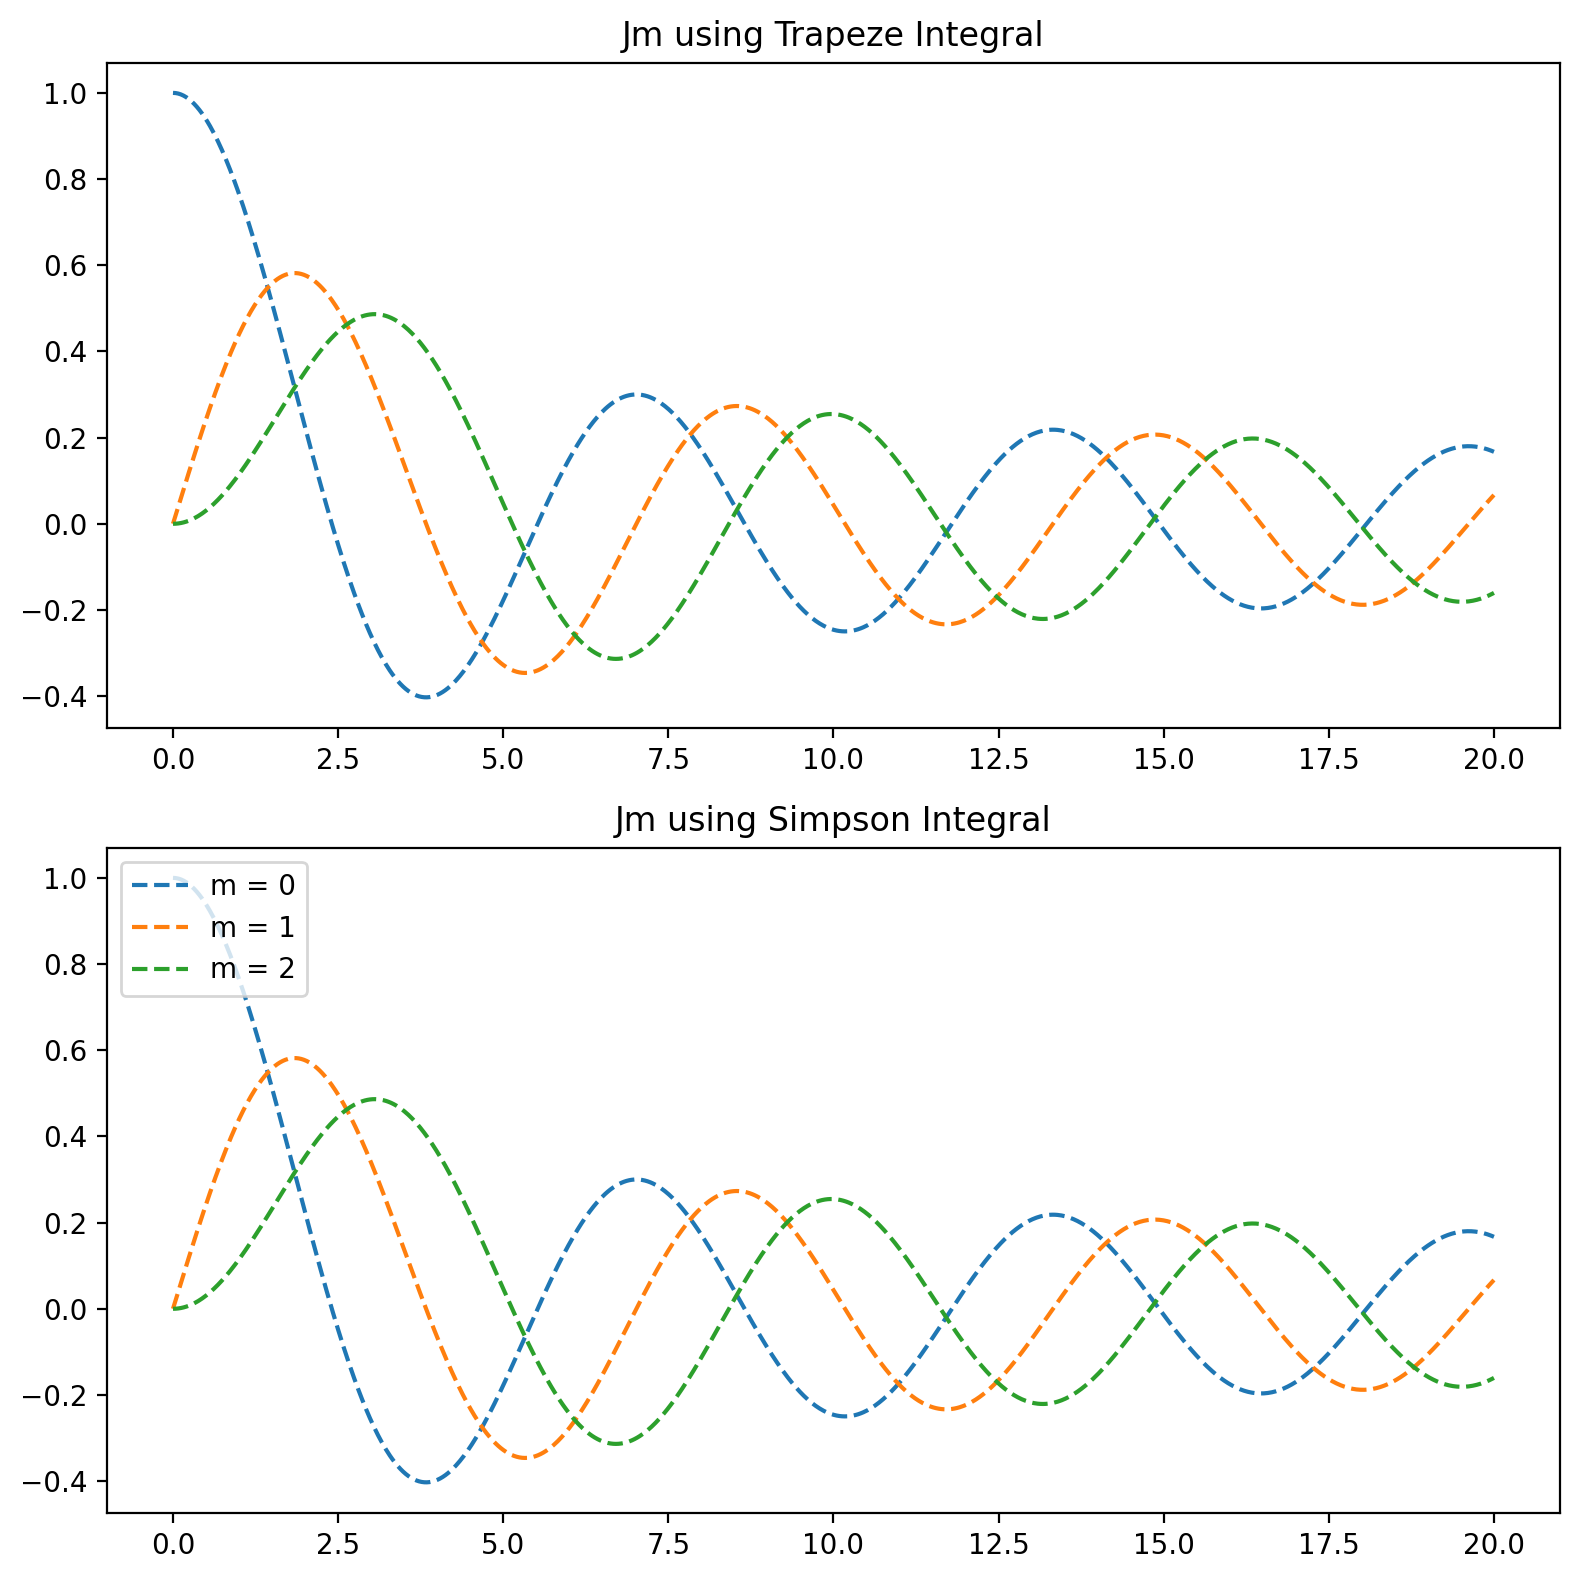

In [8]:
X = np.linspace(0, 20, 1000)

M = [0, 1, 2]
m = 0
fig, axs = plt.subplots(2)
axs[0].set_title("Jm using Trapeze Integral")
axs[1].set_title("Jm using Simpson Integral")

for m in M:
    axs[0].plot(X, JmTrapeze(X, m), '--', label = f'm = {m}')
    axs[1].plot(X, JmSimpson(X, m), '--', label = f'm = {m}')    


plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

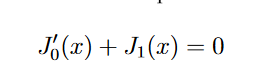

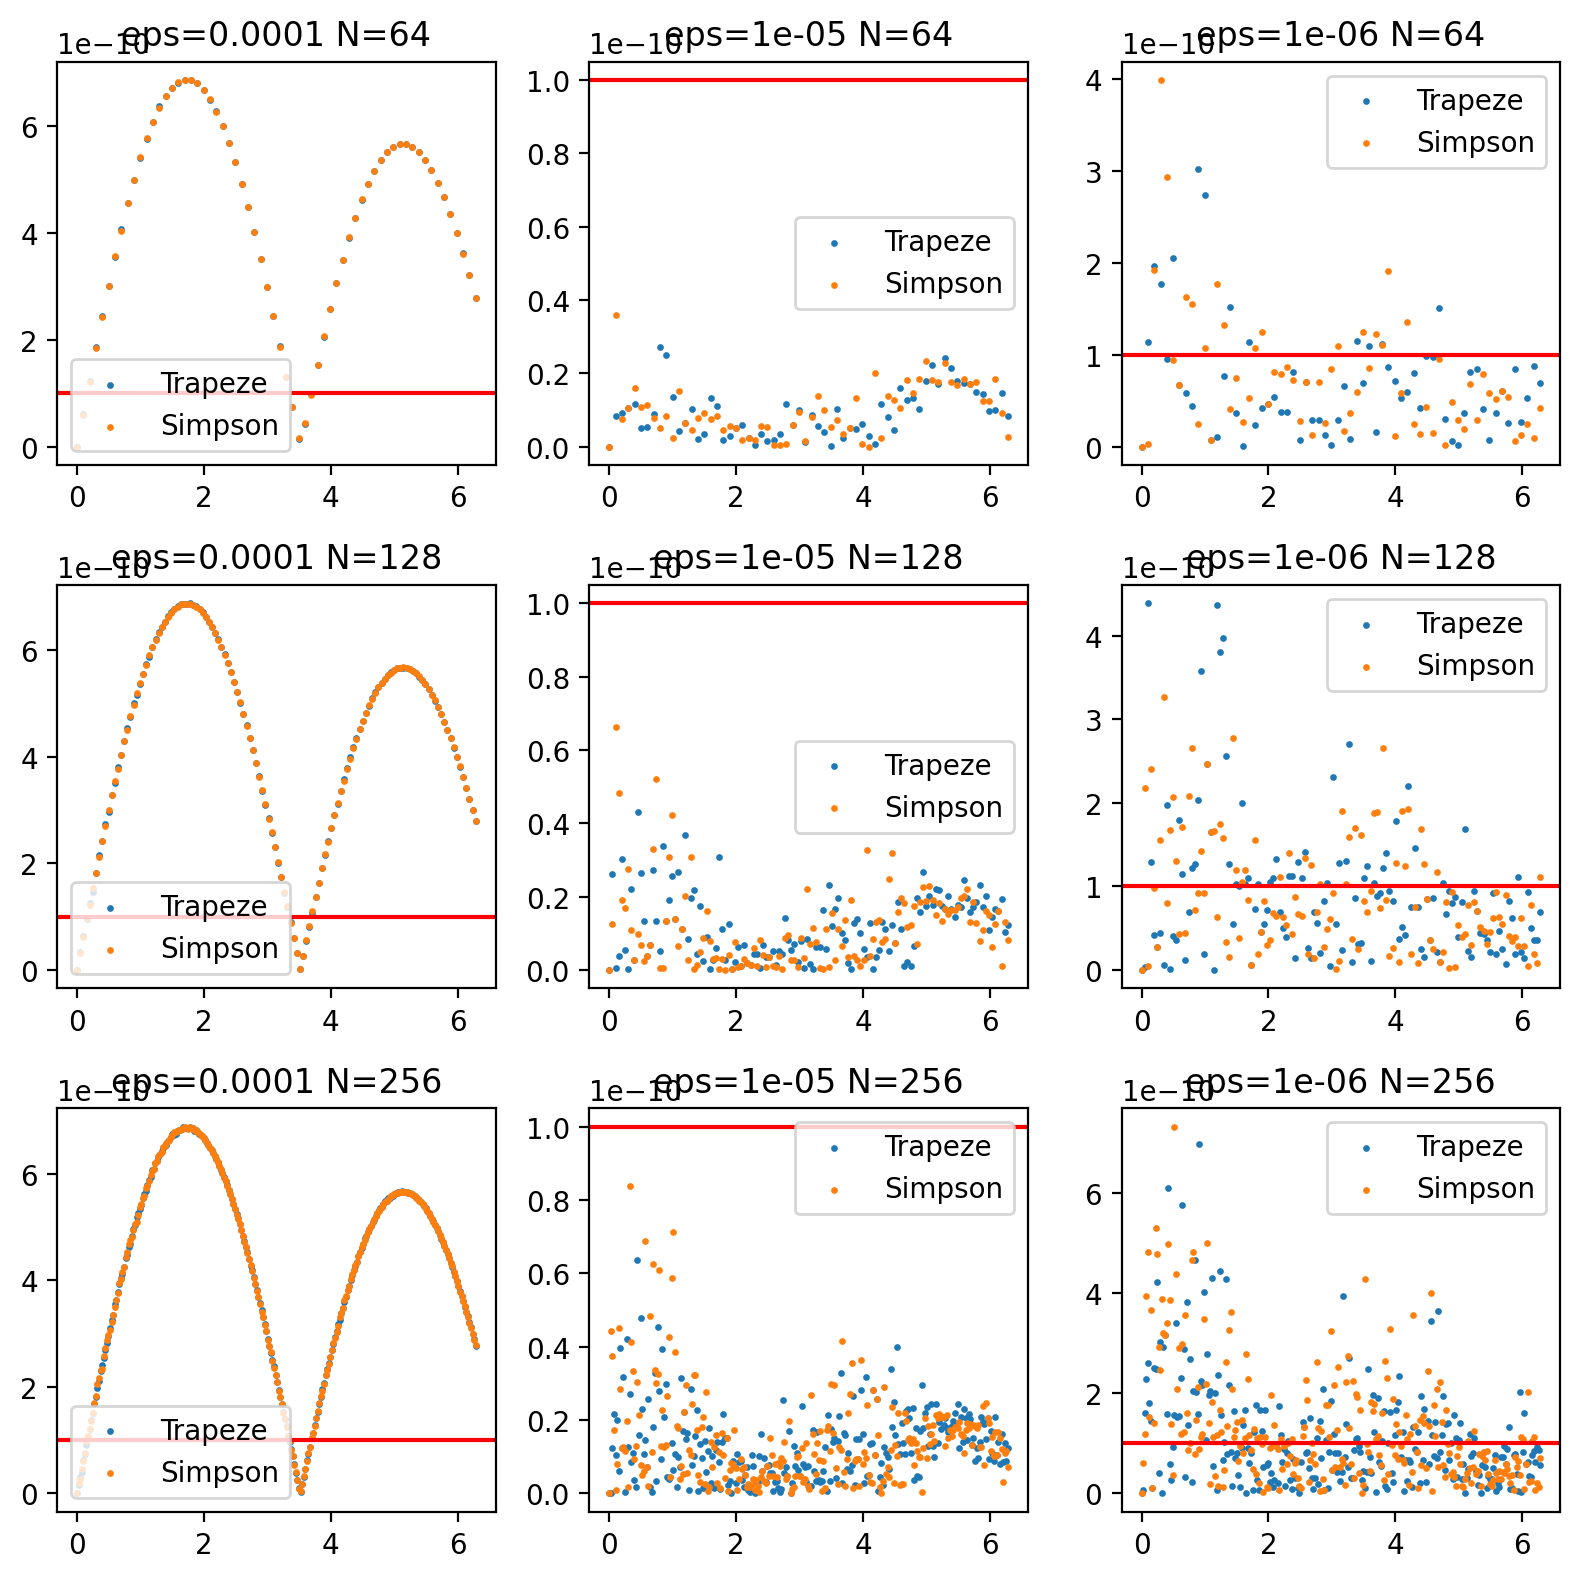

In [12]:
Ns = 2**np.arange(6, 9)

N = 512



EPS = (10.0)**(-(np.arange(4, 7)))

fig, axs = plt.subplots(len(EPS), len(Ns))
plt.tight_layout()

# Dt = []
# Ds = []

precision = 1e-10
   
for i in range(len(Ns)):
    N = Ns[i]
    X = np.linspace(0, 2*np.pi, N)
    for j in range(len(EPS)):
        eps = EPS[j]
        J0t = lambda x : JmTrapeze(x, 0, N)
        J0s = lambda x : JmSimpson(x, 0, N)
        ExpressionTrapeze = lambda x : NumericalDerivative2(J0t, x, eps)+JmTrapeze(x, 1, N) 
        ExpressionSimpson = lambda x : NumericalDerivative2(J0s, x, eps)+JmSimpson(x, 1, N) 

        Yt = np.abs(ExpressionTrapeze(X))
        Ys = np.abs(ExpressionSimpson(X))

#         Dt.append(np.max(np.abs(Yt)))
#         Ds.append(np.max(np.abs(Ys)))

    #     print(f"Trapeze, eps = {eps}")
    #     print(f"\tMax diff Trapeze: {}")
    #     print(f"\tMax diff Simpson: {max(abs(Ys))}\n\n")
        axs[i][j].set_title(f"eps={eps} N={N}")
        axs[i][j].scatter(X, Yt, s = 2)
        axs[i][j].scatter(X, Ys, s = 2)
        axs[i][j].axhline(precision, color='r')
        axs[i][j].legend(["Trapeze", "Simpson"])


# df = pd.DataFrame(np.array(np.transpose([EPS, Dt,Ds])),columns=['eps', 'TrapezeMaxDiff', 'SimpsonMaxDiff'])
# display(df)
plt.tight_layout()
plt.show()